In [ ]:
import numpy as np
from copy import deepcopy

In [ ]:
class MyNeuralNetwork():
    """
    My implementation of a Neural Network Classifier.
    """

    acti_fns = ['relu', 'sigmoid', 'linear', 'tanh', 'softmax']
    weight_inits = ['zero', 'random', 'normal']

    def __init__(self, n_layers, layer_sizes, activation, learning_rate, weight_init, batch_size, num_epochs):
        """
        Initializing a new MyNeuralNetwork object

        Parameters
        ----------
        n_layers : int value specifying the number of layers

        layer_sizes : integer array of size n_layers specifying the number of nodes in each layer

        activation : string specifying the activation function to be used
                     possible inputs: relu, sigmoid, linear, tanh

        learning_rate : float value specifying the learning rate to be used

        weight_init : string specifying the weight initialization function to be used
                      possible inputs: zero, random, normal

        batch_size : int value specifying the batch size to be used

        num_epochs : int value specifying the number of epochs to be used
        """
        self.n_layers = n_layers
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.learning_rate = learning_rate
        self.weight_init = weight_init
        self.batch_size = batch_size
        self.num_epochs = num_epochs 
        self.activation_initialization()
        if activation not in self.acti_fns:
            raise Exception('Incorrect Activation Function')

        if weight_init not in self.weight_inits:
            raise Exception('Incorrect Weight Initialization Function')
        pass
    
    def relu(self, X):    # Done
        """
        Parameters
        X : 1-dimentional numpy array 
        Returns
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = np.maximum(0,X)
        return x_calc

    def relu_grad(self, X):    # Done
        """
        Parameters
        X : 1-dimentional numpy array 
        Returns
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        X[X<=0] = 0
        X[X>0] = 1
        x_calc = X
        return x_calc

    def sigmoid(self, X):    # Done
        """
        Parameters
        X : 1-dimentional numpy array 
        Returns        
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = 1 / (1 + np.exp(-X))
        return x_calc

    def sigmoid_grad(self, X):    # Done
        """
        Parameters
        X : 1-dimentional numpy array 
        Returns        
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        sigm = 1 / (1 + np.exp(-X))
        x_calc = sigm * (1 - sigm)
        return x_calc

    def linear(self, X):    # Done
        """
        Parameters        
        X : 1-dimentional numpy array 
        Returns        
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = 0.1*X        
        return x_calc

    def linear_grad(self, X):    # Done
        """        
        Parameters        
        X : 1-dimentional numpy array 
        Returns        
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = np.ones(X.shape)        
        return x_calc

    def tanh(self, X):    # Done
        """        
        X : 1-dimentional numpy array 
        Returns        
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = np.tanh(X)
        return x_calc

    def tanh_grad(self, X):    # Done
        """
        Parameters        
        X : 1-dimentional numpy array 
        Returns        
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = 1 - (np.tanh(X)**2)
        return x_calc

    def softmax(self, X):    # Done
        """
        Parameters
        X : 1-dimentional numpy array 
        Returns
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        exps = np.exp(X - np.amax(X,axis=0))
        x_calc = exps / np.sum(exps, axis=0)        
        return x_calc

    def softmax_grad(self, X):
        """      
        Parameters
        X : 1-dimentional numpy array 
        Returns
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc = self.softmax(X) * (1 - self.softmax(X))
        return x_calc

    def activation_initialization(self):
        if self.activation == "relu":
          self.activation_func = self.relu
          self.activation_func_grad = self.relu_grad
        elif self.activation == "sigmoid":
          self.activation_func = self.sigmoid
          self.activation_func_grad = self.sigmoid_grad
        elif self.activation == "tanh":
          self.activation_func = self.tanh
          self.activation_func_grad = self.tanh_grad
        elif self.activation == "linear":
          self.activation_func = self.linear
          self.activation_func_grad = self.linear_grad
        
    def zero_init(self, shape):    # Done
        """        
        Parameters        
        shape : tuple specifying the shape of the layer for which weights have to be generated 
        Returns       
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        weight = np.zeros(shape)
        return weight

    def random_init(self, shape):    # Done
        """
        Parameters        
        shape : tuple specifying the shape of the layer for which weights have to be generated 
        Returns        
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        weight = np.random.rand(*shape)*0.01
        return weight

    def normal_init(self, shape):    # Done
        """        
        Parameters       
        shape : tuple specifying the shape of the layer for which weights have to be generated 
        Returns       
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """
        weight = np.random.randn(*shape)*0.01
        return weight

    def weight_initialization(self):
        self.weights=[]
        self.biases=[]
        if self.weight_init=='zero':
          for i in range(self.n_layers-1):
            self.weights.append(self.zero_init((self.layer_sizes[i],self.layer_sizes[i+1])))     # 784 x 256, 256 x 128, 128 x 64, 64 x10
            self.biases.append(np.zeros((self.layer_sizes[i+1],1)))      # 256 x 1 ....
        if self.weight_init=='random':
          for i in range(self.n_layers-1):
            self.weights.append(self.random_init((self.layer_sizes[i],self.layer_sizes[i+1])))     # 784 x 256, 256 x 128, 128 x 64, 64 x10
            self.biases.append(np.zeros((self.layer_sizes[i+1],1)))      # 256 x 1 ....
        if self.weight_init=='normal':
          for i in range(self.n_layers-1):
            self.weights.append(self.normal_init((self.layer_sizes[i],self.layer_sizes[i+1])))     # 784 x 256, 256 x 128, 128 x 64, 64 x10
            self.biases.append(np.zeros((self.layer_sizes[i+1],1)))      # 256 x 1 ....

    def load_weights_biases(self,weights,biases):
      self.weights = weights
      self.biases = biases
  
    def forward_prop(self, X):
        """
        Parameters      
        X : 1-dimentional numpy array (784x1)
        Returns        
        z_list, a_list
        """
        z_list=[]
        a_list=[]
        self.tsne_list=[]
        a_list.append(X)                                       
        for i in range(0, self.n_layers-1):   #0,1,2,3
          # print(i, self.weights[i].shape, a_list[i].shape, self.biases[i].shape)
          z = np.dot(self.weights[i].T,a_list[i]) + self.biases[i]    #256x784 X 784x100 = 256x100 , 128x256 X 256x100
          z_list.append(z)
          # print(i,z)          
          if (i==self.n_layers-2):            
            a_list.append(self.softmax(z))            
          elif (i==self.n_layers-3):
            a_list.append(self.activation_func(z))          
            self.tsne_list.append(self.activation_func(z))
          else:
            a_list.append(self.activation_func(z))          
        return z_list, a_list

    def entropy_loss(self, y, y_prob):            
      y_prob = y_prob.T
      for i in range(len(self.classes)):
        y[y == self.classes[i]] = i
      loss = 0
      for i in range(y_prob.shape[0]):
        loss -= np.sum(np.log(y_prob[i, y == i]))
      return loss/y_prob.shape[1]            

    def backward_prop(self,z_list,a_list,y):   
      # print("----------BACKPROP-----------")   
      # error = 2 * self.entropy_loss(y,a_list[-1])
      error = a_list[-1]      
      for i in range(error.shape[0]):
        error[i,y==i] -= 1     
      weight_changes= [0]*(self.n_layers-1)
      bias_changes=[0]*(self.n_layers-1)
      for i in range(self.n_layers-2, -1, -1):                   
        weight_changes[i] = np.dot(error, a_list[i].T).T 
        bias_changes[i] = error.mean(axis=1).reshape((-1,1))       
        if i!=0:                    
          error = np.multiply(np.dot(self.weights[i], error), self.activation_func_grad(z_list[i-1]))              
      for i in range(len(self.weights)):
        self.weights[i] -= (self.learning_rate * weight_changes[i])
        self.biases[i] -= (self.learning_rate * bias_changes[i])
    
    def one_hot(self, y):
      onehot_y = np.zeros((y.size,y.max()+1))
      onehot_y[np.arange(y.size),y] = 1      
      return onehot_y
  
    def fit(self, X, y):
        """
        Parameters        
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.
        y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.      
        Returns        
        self : an instance of self
        """                
        self.classes, y = np.unique(y, return_inverse=True)                       
        # self.activation_initialization()
        self.weight_initialization()
        self.save_weights_per_epoch=[]
        self.save_biases_per_epoch=[]
        self.training_loss_per_epoch=[]
        for i in range(self.num_epochs):
          for j in range(0,len(y),self.batch_size):          
            X_batch = X[j:j+self.batch_size,:].T            
            z_list, a_list = self.forward_prop(X_batch)
            self.backward_prop(z_list, a_list, y[j:j+self.batch_size])
          loss = self.entropy_loss(y,self.predict_proba(X))
          print("Epoch:",i+1,"| Loss:",loss)          
          self.training_loss_per_epoch.append(loss)
          self.save_weights_per_epoch.append(deepcopy(self.weights))
          self.save_biases_per_epoch.append(deepcopy(self.biases))
        # fit function has to return an instance of itself or else it won't work with test.py
        return self

    def predict_proba(self, X):
        """
        Parameters        
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.
        Returns      
        y : 2-dimensional numpy array of shape (n_samples, n_classes) which contains the 
            class wise prediction probabilities.
        """      
        z_list,a_list = self.forward_prop(X.T)
        y = a_list[-1].T
        # return the numpy array y which contains the predicted values
        return y

    def predict(self, X):
        """      
        Parameters        
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.
        Returns        
        y : 1-dimensional numpy array of shape (n_samples,) which contains the predicted values.
        """
        y_prob = self.predict_proba(X)
        y_ind = y_prob.argmax(axis=1)
        y = self.classes[y_ind]
        # return the numpy array y which contains the predicted values
        return y
    
    def score(self, X, y):
        """
        Predicting values using the trained linear model.
        Parameters        
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.
        y : 1-dimensional numpy array of shape (n_samples,) which acts as testing labels.
        Returns        
        acc : float value specifying the accuracy of the model on the provided testing set
        """  
        self.classes, y = np.unique(y, return_inverse=True)
        y_pred = self.predict(X)            
        acc = np.mean(y==y_pred)  
        return acc

  

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train /255
X_test = X_test /255

In [ ]:
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


In [ ]:
nn = MyNeuralNetwork(5,[784,256,128,64,10],'relu',0.01,'normal',64,100)
nn.fit(X_train,y_train)

Epoch: 1 | Loss: 0.31572486495647356
Epoch: 2 | Loss: 0.17384950558433435


KeyboardInterrupt: ignored

In [ ]:
model_weights_per_epoch = nn.save_weights_per_epoch
model_biases_per_epoch = nn.save_biases_per_epoch
model_traning_loss_per_epoch = nn.training_loss_per_epoch

In [ ]:
model_validation_loss_per_epoch = []
for i in range(len(model_weights_per_epoch)):  
  nn.load_weights_biases(model_weights_per_epoch[i],model_biases_per_epoch[i])
  loss = nn.entropy_loss(y_test, nn.predict_proba(X_test))
  # score = nn.score(X_test,y_test)  
  model_validation_loss_per_epoch.append(loss)

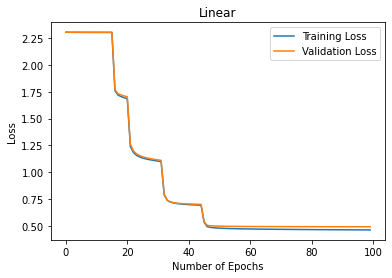

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_traning_loss_per_epoch,label="Training Loss")
plt.plot(model_validation_loss_per_epoch,label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Linear")
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
saving_weights = np.array(model_weights_per_epoch)
np.savez("linear_weights_per_epoch",saving_weights)
!cp linear_weights_per_epoch.npz "drive/My Drive/ML_NeuralNet"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
saving_biases = np.array(model_biases_per_epoch)
np.savez("linear_biases_per_epoch",saving_biases)
!cp linear_biases_per_epoch.npz "drive/My Drive/ML_NeuralNet"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
y=nn.score(X_test,y_test)
y

0.8598

In [ ]:
w1 = np.load("drive/My Drive/ML_NeuralNet/relu_weights_per_epoch.npz",allow_pickle=True)
w2 = w1["arr_0"]
b1 = np.load("drive/My Drive/ML_NeuralNet/relu_biases_per_epoch.npz", allow_pickle=True)
b2 = b1["arr_0"]
nn_loaded = MyNeuralNetwork(5,[784,256,128,64,10],'relu',0.01,'normal',64,100)
nn_loaded.load_weights_biases(w2[-1],b2[-1])


In [ ]:
y=nn_loaded.score(X_test,y_test)
y

0.9828

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=[256,128,64],activation='relu', alpha=0, batch_size=64,learning_rate='constant',learning_rate_init=0.01,momentum=0,verbose=True,max_iter= 100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=[256,128,64],activation='tanh', alpha=0, batch_size=64,learning_rate='constant',learning_rate_init=0.01,momentum=0,verbose=True,max_iter= 100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=[256,128,64],activation='logistic', alpha=0, batch_size=64,learning_rate='constant',learning_rate_init=0.01,momentum=0,verbose=True,max_iter= 100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=[256,128,64],activation='identity', alpha=0, batch_size=64,learning_rate='constant',learning_rate_init=0.01,momentum=0,verbose=True,max_iter= 100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
z , a = nn_loaded.forward_prop(X_test.T)
tsne_list = np.array(nn_loaded.tsne_list)
print(tsne_list.shape)
tsne_list = np.reshape(tsne_list, (64,10000)).T
tsne_list.shape

(1, 64, 10000)


(10000, 64)

In [ ]:

from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_test = scaler.fit_transform(X_test)
import pandas as pd
# tsne_list = tsne_list[:200]
df = pd.DataFrame(tsne_list)
# y_test = y_test[:200]
df_2 = pd.DataFrame(y_test)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

X_2d = tsne.fit_transform(df)


In [ ]:
tsne_df = pd.DataFrame(data=X_2d, columns=("Dimesion 1", "Dimension 2"))
tsne_df["label"]= df_2

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


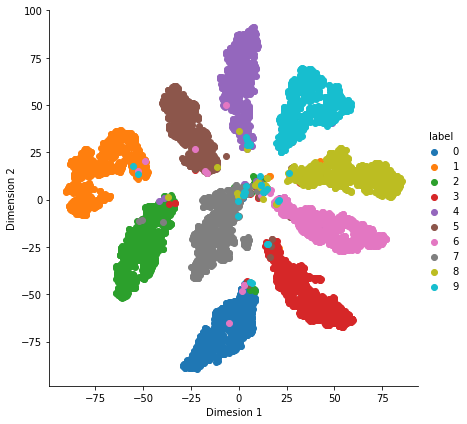

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dimesion 1", "Dimension 2").add_legend()
plt.show()